# 저장된 전이 학습 모델 호출하여 구름 분류하기

## 1. 사용할 패키지 불러오기

In [1]:
## 사용할 패키지 불러오기

import cv2    # 이미지 입출력
import glob   # 경로 찾기
from PIL import Image   # 이미지 변환

# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

# 예측(추론) 대상 이미지 불러오기 & 변환하기
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# 모델 예측(추론) 결과(클래스 분류) 출력하기
import numpy as np
from numpy import argmax

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 모델 불러오기

In [2]:
# 전이 학습 모델 불러오기
model = load_model('cloud6_model.h5')

# 전이 학습 모델 요약보기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

## 3. 모델 사용하기

### 3.1 클래스 이름 붙이기

In [3]:
# 구름 6종 분류 클래스 이름
class_name=['A - Clear Sky','B - Patterned Cloud','C - Thin White Clouds',
            'D - Thick White Clouds','E - Thick Dark Clouds','F - Veil Clouds']

### 3.2 모델 예측(추론) : 단일 이미지

### 3.2.1 이미지 준비하기

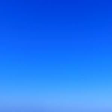

In [4]:
# 클래스 예측 대상 clear sky 이미지 불러오기
img_clear = load_img('./my_own_images/clear_and_cloudy/clear1.jfif', target_size=(224, 224))
img_clear.resize((112,112))

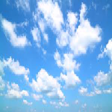

In [5]:
# 클래스 예측 대상 cloudy sky 이미지 불러오기
img_cloudy = load_img('./my_own_images/clear_and_cloudy/cloudy1.jfif', target_size=(224, 224))
img_cloudy.resize((112,112))

In [6]:
# 모델 입력을 위해 2차원 이미지 데이터를 2차원 배열로 변환
arr_clear = img_to_array(img_clear)
arr_cloudy = img_to_array(img_cloudy)

# 결합 전 입력 데이터 모양 출력
print(arr_clear.shape, arr_cloudy.shape)

(224, 224, 3) (224, 224, 3)


In [7]:
# 모델 입력을 위해 데이터 전처리 (중심화 및 컬러 채널 순서 변경)
arr_clear = preprocess_input(arr_clear)
arr_cloudy = preprocess_input(arr_cloudy)

# 모델 입력을 위해 데이터 결합
arr_input = np.stack([arr_clear, arr_cloudy])

# 결합 후 입력 데이터 모양 출력 
print('shape of arr_input:', arr_input.shape)

shape of arr_input: (2, 224, 224, 3)


### 3.2.2 예측하기

In [8]:
# 모델을 이용한 입력 데이터 클래스 예측(추론) 결과 산출
y_pred = model.predict(arr_input)

# 예측 결과 모양 출력
print('shape of y_pred:', y_pred.shape)

# 예측 결과 출력
y_pred

shape of y_pred: (2, 6)


array([[2.9181008e-10, 9.4378057e-24, 1.0000000e+00, 3.5072035e-13,
        2.2556849e-30, 4.4780556e-27],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

### 3.2.3 예측 결과 확인하기

In [9]:
# 예측 결과 출력
y_pred[0]

array([2.9181008e-10, 9.4378057e-24, 1.0000000e+00, 3.5072035e-13,
       2.2556849e-30, 4.4780556e-27], dtype=float32)

    Prediction result :  2
    Class name :  C - Thin White Clouds


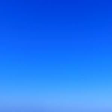

In [10]:
print('    Prediction result : ', np.argmax(y_pred[0]))   
print('    Class name : ', class_name[np.argmax(y_pred[0])])
img_clear.resize((112,112))

In [11]:
# 예측 결과 출력
y_pred[1]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

    Prediction result :  2
    Class name :  C - Thin White Clouds


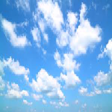

In [12]:
print('    Prediction result : ', np.argmax(y_pred[1]))  
print('    Class name : ', class_name[np.argmax(y_pred[1])])
img_cloudy.resize((112,112))

### 3.3 모델 예측 (추론) : 임의의 다중 이미지

### 3.3.1 이미지 준비하기

In [13]:
# 예측 대상 다중 이미지 불러오기
file = "./my_own_images/clear_and_cloudy/*"
filelist = glob.glob(file)
filelist = sorted(filelist)

#### OpenCV 이용시 주의사항: OpenCV도 다차원 NumPy 배열로 RGB 영상을 표현하지만 순서가 반대

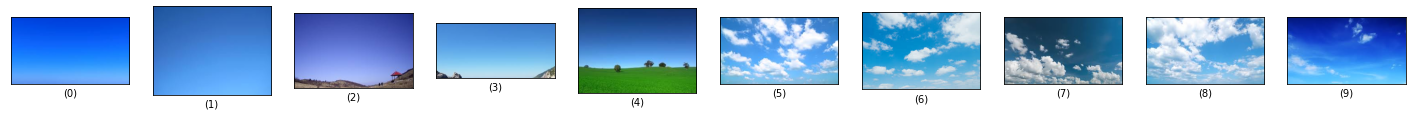

In [14]:
# rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 10
 
fig = plt.figure(figsize=(25,25)) 
xlabels = ["xlabel", "(0)", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)" ]

i = 1
for filename in filelist:
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR 로 읽어들인 것을 RGB로 전환
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()

### 3.3.2 예측 및 결과 출력하기

In [15]:
n = len(filelist)

for i in range (n):   
    
    # 2차원 이미지 데이터를 사이즈 변환해서 불러오기 (VGG16 입력 사이즈(224*224 픽셀))
    img_test = load_img(filelist[i], target_size=(224, 224))
    img_test
    #print('Test image number =',i,'    File name : ', filelist[i])    
      
    # 2차원 이미지 데이터를 1차원 배열로 변환하기
    arr_test = img_to_array(img_test)

    # 입력 데이터 전처리 (중심화 및 컬러 채널 순서 RGB --> BGR로 변경)
    arr_test = preprocess_input(arr_test)

    # 입력 데이터 결합 (VGG16 입력 차원으로 만들기)
    arr_input = np.stack([arr_test])    
    
    # 입력 데이터 모양 출력 
    #print('  Shape of arr_input:', arr_input.shape)

    # 입력 데이터 클래스 예측 결과 산출
    y_pred = model.predict(arr_input)
    
    # 예측 결과 모양 출력
    #print('           Shape of probs:', y_pred.shape)

    # 예측 결과 출력
    #print(probs)
    print('(', i, ')', ' Result : ', np.argmax(y_pred), '   /   Class name : ', class_name[np.argmax(y_pred)])

( 0 )  Result :  2    /   Class name :  C - Thin White Clouds
( 1 )  Result :  2    /   Class name :  C - Thin White Clouds
( 2 )  Result :  2    /   Class name :  C - Thin White Clouds
( 3 )  Result :  2    /   Class name :  C - Thin White Clouds
( 4 )  Result :  2    /   Class name :  C - Thin White Clouds
( 5 )  Result :  2    /   Class name :  C - Thin White Clouds
( 6 )  Result :  2    /   Class name :  C - Thin White Clouds
( 7 )  Result :  2    /   Class name :  C - Thin White Clouds
( 8 )  Result :  2    /   Class name :  C - Thin White Clouds
( 9 )  Result :  2    /   Class name :  C - Thin White Clouds


### 3.4 모델 예측 (추론) : 정제된 다중 이미지

### 3.4.1 이미지 준비하기

In [16]:
# 정제된 다중 이미지 불러오기  (150*150 픽셀, PNG)
file2 = "./my_own_images/test_cloud_images/*"
filelist2 = glob.glob(file2)
filelist2 = sorted(filelist2)

In [17]:
import random

# 이미지를 랜덤하게 섞기
#random.shuffle(filelist2)
image_count = len(filelist2)
print('image_count:', image_count)

image_count: 60


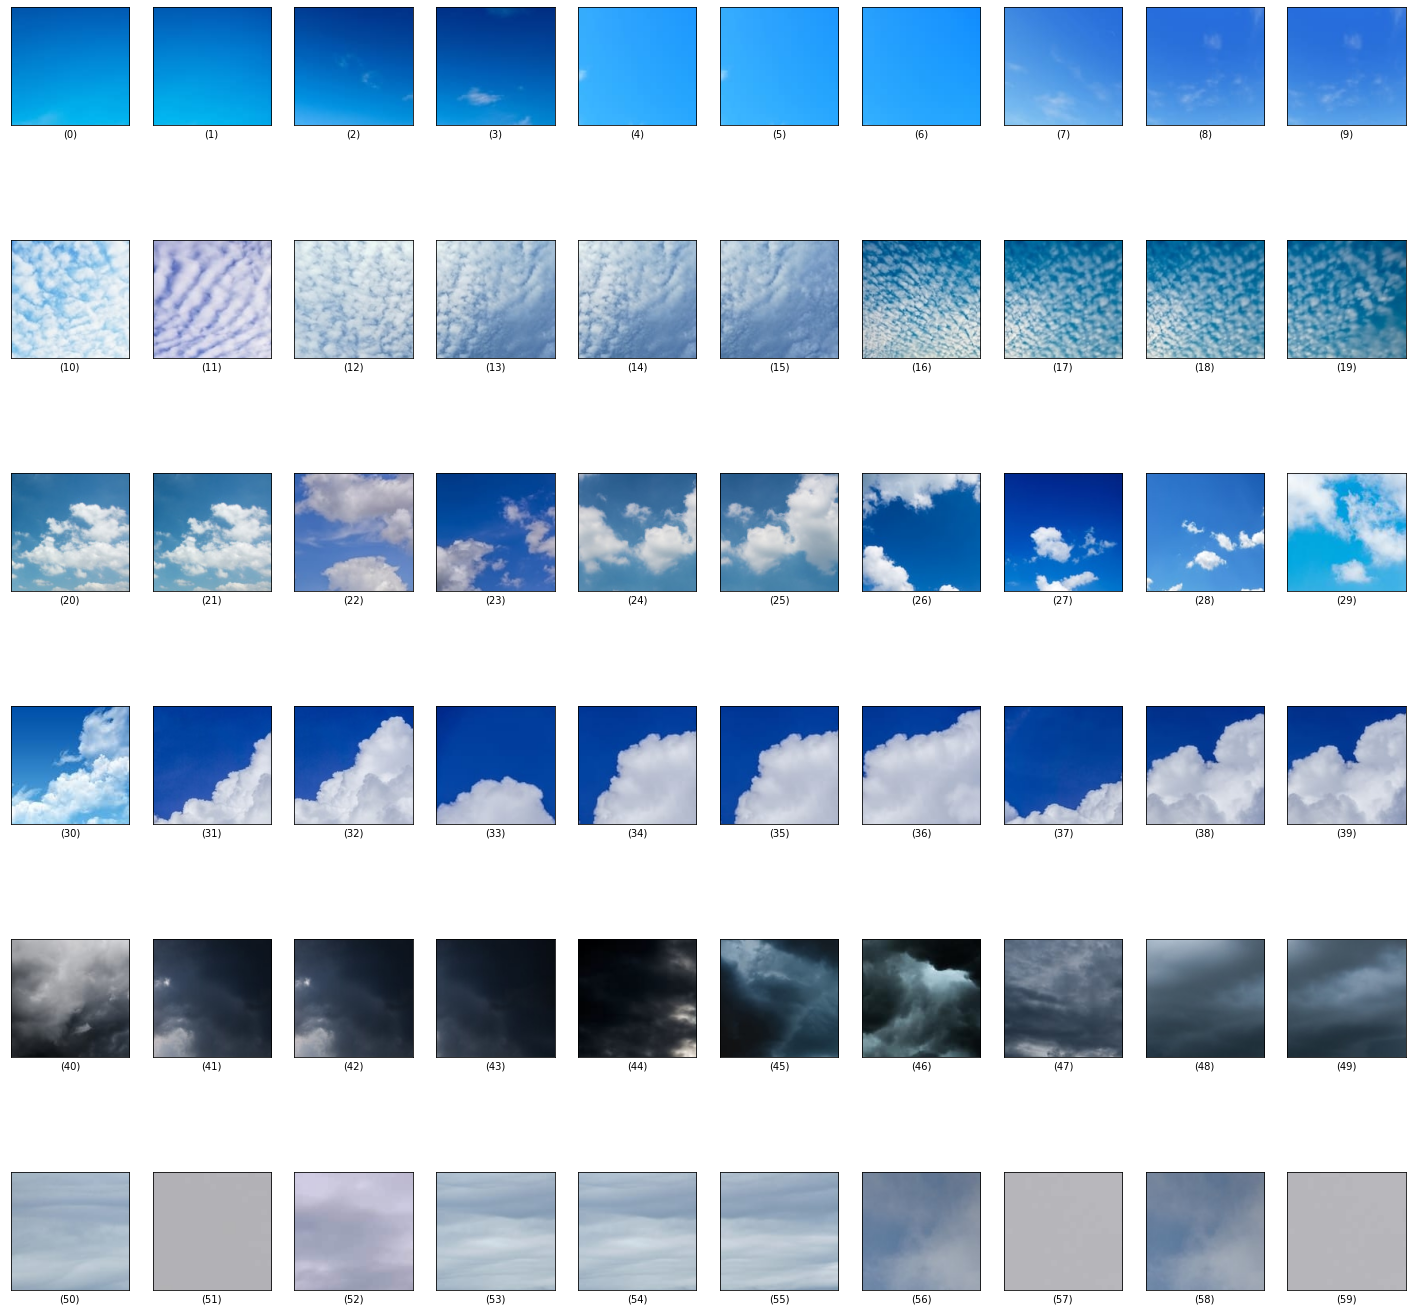

In [18]:
# rows*cols 행렬의 i번째 subplot 생성
rows = 6
cols = 10
 
fig = plt.figure(figsize=(25,25)) 
xlabels = ["xlabel"
          , "(0)", "(1)", "(2)", "(3)", "(4)", "(5)", "(6)", "(7)", "(8)", "(9)" 
          , "(10)", "(11)", "(12)", "(13)", "(14)", "(15)", "(16)", "(17)", "(18)", "(19)" 
          , "(20)", "(21)", "(22)", "(23)", "(24)", "(25)", "(26)", "(27)", "(28)", "(29)" 
          , "(30)", "(31)", "(32)", "(33)", "(34)", "(35)", "(36)", "(37)", "(38)", "(39)" 
          , "(40)", "(41)", "(42)", "(43)", "(44)", "(45)", "(46)", "(47)", "(48)", "(49)" 
          , "(50)", "(51)", "(52)", "(53)", "(54)", "(55)", "(56)", "(57)", "(58)", "(59)"]
           
i = 1
for filename in filelist2:
    img = cv2.imread(filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR 로 읽어들인 것을 RGB로 변경
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])
    i += 1
 
plt.show()

### 3.4.2 예측 및 결과 출력하기

In [19]:
n = len(filelist2)

y_pred=[]
pred_result = []

for i in range (n):   
    
    # 2차원 이미지 데이터를 사이즈 변환해서 불러오기 (VGG16 입력 사이즈(224*224 픽셀))
    img_test = load_img(filelist2[i], target_size=(224, 224))
    img_test
    #print('Test image number =',i,'    File name : ', filelist[i])    
      
    # 2차원 이미지 데이터를 1차원 배열로 변환하기
    arr_test = img_to_array(img_test)

    # 입력 데이터 전처리 (중심화 및 컬러 채널 순서 RGB --> BGR로 변경)
    arr_test = preprocess_input(arr_test)

    # 입력 데이터 결합 (VGG16 입력 차원으로 만들기)
    arr_input = np.stack([arr_test])    
    
    # 입력 데이터 모양 출력 
    #print('  Shape of arr_input:', arr_input.shape)

    # 입력 데이터 클래스 예측 결과 산출
    y_pred = model.predict(arr_input)
    
    # 예측 결과 모양 출력
    #print('           Shape of probs:', probs.shape)

    # 예측 결과 출력
    #print(probs)
    print('(', i, ')', ' Result : ', np.argmax(y_pred), 
                                              '  /   Class : ', class_name[np.argmax(y_pred)])
    pred_result = np.append(pred_result, np.argmax(y_pred))

( 0 )  Result :  2   /   Class :  C - Thin White Clouds
( 1 )  Result :  0   /   Class :  A - Clear Sky
( 2 )  Result :  2   /   Class :  C - Thin White Clouds
( 3 )  Result :  2   /   Class :  C - Thin White Clouds
( 4 )  Result :  2   /   Class :  C - Thin White Clouds
( 5 )  Result :  2   /   Class :  C - Thin White Clouds
( 6 )  Result :  0   /   Class :  A - Clear Sky
( 7 )  Result :  2   /   Class :  C - Thin White Clouds
( 8 )  Result :  2   /   Class :  C - Thin White Clouds
( 9 )  Result :  2   /   Class :  C - Thin White Clouds
( 10 )  Result :  2   /   Class :  C - Thin White Clouds
( 11 )  Result :  1   /   Class :  B - Patterned Cloud
( 12 )  Result :  1   /   Class :  B - Patterned Cloud
( 13 )  Result :  1   /   Class :  B - Patterned Cloud
( 14 )  Result :  1   /   Class :  B - Patterned Cloud
( 15 )  Result :  1   /   Class :  B - Patterned Cloud
( 16 )  Result :  1   /   Class :  B - Patterned Cloud
( 17 )  Result :  1   /   Class :  B - Patterned Cloud
( 18 )  Result

In [20]:
pred_result

array([2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 2., 2., 2., 2., 2., 3., 2., 3.])

## 3.4.3 예측 결과 평가하기

In [21]:
# 정답율

score_true = 0
score_false = 0

y_true = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,
          3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5]

for i in range(n):
    print('(', i, ')', '정답 값 : ', y_true[i], '/ 예측 값 : ', int(pred_result[i]))
   
    if y_true[i] == pred_result[i] :      
        score_true = score_true + 1
    else :
        score_false = score_false + 1
        
print('')
print('Score_True =', score_true, '(', score_true/n*100,'% )', 
      '     Score_False =', score_false,'(', score_false/n*100, '% )')    

( 0 ) 정답 값 :  0 / 예측 값 :  2
( 1 ) 정답 값 :  0 / 예측 값 :  0
( 2 ) 정답 값 :  0 / 예측 값 :  2
( 3 ) 정답 값 :  0 / 예측 값 :  2
( 4 ) 정답 값 :  0 / 예측 값 :  2
( 5 ) 정답 값 :  0 / 예측 값 :  2
( 6 ) 정답 값 :  0 / 예측 값 :  0
( 7 ) 정답 값 :  0 / 예측 값 :  2
( 8 ) 정답 값 :  0 / 예측 값 :  2
( 9 ) 정답 값 :  0 / 예측 값 :  2
( 10 ) 정답 값 :  1 / 예측 값 :  2
( 11 ) 정답 값 :  1 / 예측 값 :  1
( 12 ) 정답 값 :  1 / 예측 값 :  1
( 13 ) 정답 값 :  1 / 예측 값 :  1
( 14 ) 정답 값 :  1 / 예측 값 :  1
( 15 ) 정답 값 :  1 / 예측 값 :  1
( 16 ) 정답 값 :  1 / 예측 값 :  1
( 17 ) 정답 값 :  1 / 예측 값 :  1
( 18 ) 정답 값 :  1 / 예측 값 :  1
( 19 ) 정답 값 :  1 / 예측 값 :  1
( 20 ) 정답 값 :  2 / 예측 값 :  2
( 21 ) 정답 값 :  2 / 예측 값 :  2
( 22 ) 정답 값 :  2 / 예측 값 :  2
( 23 ) 정답 값 :  2 / 예측 값 :  2
( 24 ) 정답 값 :  2 / 예측 값 :  2
( 25 ) 정답 값 :  2 / 예측 값 :  2
( 26 ) 정답 값 :  2 / 예측 값 :  2
( 27 ) 정답 값 :  2 / 예측 값 :  2
( 28 ) 정답 값 :  2 / 예측 값 :  2
( 29 ) 정답 값 :  2 / 예측 값 :  2
( 30 ) 정답 값 :  3 / 예측 값 :  2
( 31 ) 정답 값 :  3 / 예측 값 :  2
( 32 ) 정답 값 :  3 / 예측 값 :  2
( 33 ) 정답 값 :  3 / 예측 값 :  2
( 34 ) 정답 값 :  3 / 예측 값 

## END